In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

In [2]:
plt.rcParams["axes.facecolor"] = '#0d1117'
plt.rcParams["figure.facecolor"] = '#0d1117'

# plt.rcParams['figure.figsize'] = [7.0, 3.0]
plt.rcParams['figure.dpi'] = 100

# plt.rcParams["axes.spines.bottom.color"]
# plt.rcParams["axes.spines.left"] = '#0d1117'
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

plt.rcParams["axes.edgecolor"] = "#eef7f4"

plt.rcParams["xtick.color"] = '#eef7f4'
plt.rcParams["ytick.color"] = '#eef7f4'


plt.rcParams["axes.labelcolor"] = '#eef7f4'

plt.rcParams["grid.color"] = '#eef7f4'

plt.rcParams["legend.frameon"] = False

plt.rcParams['axes.prop_cycle'] = cycler(color=['g', 'r', 'b', 'y'])

In [7]:
def quad_fr(k_func, f_func, a, b, h):
    x = np.linspace(a, b, int((b-a)/h))
    n = len(x)
    wt = 0.5
    wj = 1
    a = np.zeros((n,n), dtype=float)
    for i in range(n):
        a[i, 0] = -h*wt*k_func(x[i], x[0])
        for j in range(1, n-1):
            a[i,j] = -h*wj*k_func(x[i], x[j])
        a[i,n-1] = -h*wt*k_func(x[i], x[n-1])
        a[i,i] += 1.
        b = np.zeros_like(x)
        for j in range(n):
            b[j] = f_func(x[j])
    y = np.linalg.solve(a, b)
    return y


In [8]:
h = np.pi / 18
a = - np.pi
b = np.pi
l = 3/(10*np.pi)
k = lambda x, s: 1/(0.64*np.cos((x+s)/2)**2 - 1)*l
f = lambda x: 25 - 16*np.sin(x)**2
y_exact_ = lambda x: 17/2 + 128/17*np.cos(2*x)
x_ = np.linspace(a, b, int((b-a)/h))
y_approx = quad_fr(k, f, a, b, h)

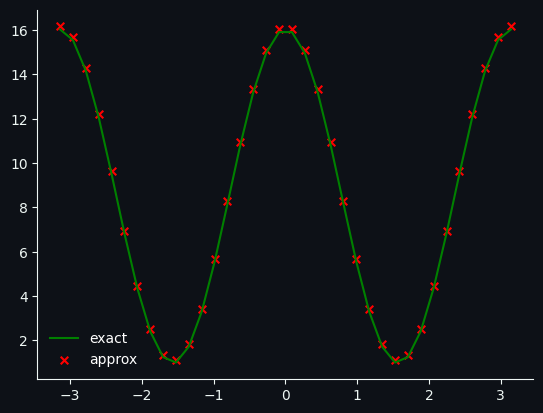

In [18]:
plt.plot(x_, y_exact_(x_), label="exact")
plt.scatter(x_, y_approx, label="approx", c='r', marker='x', s=30)
plt.legend(labelcolor="w")